# Time resolution effect

To understand if the difference of Juno distribution at 1AU and beyond is due to time resolution, i.e. it’s possile that 1s is sufficient to resolve distribution at r\>1.5AU, but insufficient at 1AU. To check this we may compare ARTEMIS data at 1AU for two resolutions - 1s and 1/5s

In [1]:
from ids_finder.utils.basic import load_params
from ids_finder.utils.basic import load_catalog

import polars as pl

from beforerr.r import py2rpy_polars
import rpy2.robjects as robjects

::: {#cell-2 .cell 0=‘h’ 1=‘i’ 2=‘d’ 3=‘e’ execution_count=2}

``` python
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

r = robjects.r
r.source('utils.R')

conv_pl = py2rpy_polars()
```

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="color: #7fbfbf; text-decoration-color: #7fbfbf">[01/08/24 11:11:19] </span><span style="color: #800000; text-decoration-color: #800000">WARNING </span> R<span style="font-weight: bold">[</span>write to console<span style="font-weight: bold">]</span>:                                                  <a href="file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py" target="_blank"><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">callbacks.py</span></a><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">:</span><a href="file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124" target="_blank"><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">124</span></a>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>         Attaching package: ‘dplyr’                                            <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span><span style="color: #800000; text-decoration-color: #800000">WARNING </span> R<span style="font-weight: bold">[</span>write to console<span style="font-weight: bold">]</span>: The following objects are masked from            <a href="file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py" target="_blank"><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">callbacks.py</span></a><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">:</span><a href="file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124" target="_blank"><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">124</span></a>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>         ‘package:stats’:                                                      <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>             filter, lag                                                       <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span><span style="color: #800000; text-decoration-color: #800000">WARNING </span> R<span style="font-weight: bold">[</span>write to console<span style="font-weight: bold">]</span>: The following objects are masked from            <a href="file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py" target="_blank"><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">callbacks.py</span></a><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">:</span><a href="file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124" target="_blank"><span style="color: #7f7f7f; text-decoration-color: #7f7f7f">124</span></a>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>         ‘packag<span style="color: #00ff00; text-decoration-color: #00ff00; font-weight: bold">e:ba</span>se’:                                                       <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>             intersect, setdiff, setequal, union                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
<span style="color: #7fbfbf; text-decoration-color: #7fbfbf">                    </span>                                                                               <span style="color: #7f7f7f; text-decoration-color: #7f7f7f">                </span>
</pre>

:::

In [3]:
params = load_params()
catalog = load_catalog()

[01/08/24 11:11:19] WARNING /Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/ warnings.py : 109 
 kedro_datasets/polars/ lazy_polars_dataset.py : 14 : 
 KedroDeprecationWarning: 'AbstractVersionedDataSet' has been renamed 
 to 'AbstractVersionedDataset' , and the alias will be removed in Kedro 
 0.19 . 0 
 from kedro.io.core import (

In [4]:
wind_ts_low_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_1s_tau_60s')
wind_ts_high_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.09s_tau_60s')
wind_ts_01_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.1s_tau_60s')
wind_ts_02_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.2s_tau_60s')
wind_ts_05_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.5s_tau_60s')
juno_ts_low_all: pl.LazyFrame = catalog.load('events.l1.JNO_ts_1s_tau_60s')

time_filter = pl.col('time').dt.year()==2016

wind_ts_low = wind_ts_low_all.filter(time_filter).with_columns(
    ts = pl.lit('1s'),
    sat = pl.lit('Wind')
)
wind_ts_high = wind_ts_high_all.filter(time_filter).with_columns(
    ts = pl.lit('0.09s'),
    sat = pl.lit('Wind')
)

wind_ts_01 = wind_ts_01_all.filter(time_filter).with_columns(
    ts = pl.lit('0.1s'),
    sat = pl.lit('Wind')
)
wind_ts_02 = wind_ts_02_all.filter(time_filter).with_columns(
    ts = pl.lit('0.2s'),
    sat = pl.lit('Wind')
)
wind_ts_05 = wind_ts_05_all.filter(time_filter).with_columns(
    ts = pl.lit('0.5s'),
    sat = pl.lit('Wind')
)

juno_ts_low = juno_ts_low_all.filter(time_filter).with_columns(
    ts = pl.lit('Juno 1s'),
    sat = pl.lit('JUNO')
)

df = pl.concat([juno_ts_low, wind_ts_high, wind_ts_01, wind_ts_02, wind_ts_05, wind_ts_low], how='diagonal').collect()

%R -i df -c conv_pl


[01/08/24 11:11:20] INFO Loading data from 'events.l1.Wind_ts_1s_tau_60s' data_catalog.py : 502 
 ( LazyPolarsDataset ) ...

INFO Loading data from 'events.l1.Wind_ts_0.09s_tau_60s' data_catalog.py : 502 
 ( LazyPolarsDataset ) ...

INFO Loading data from 'events.l1.Wind_ts_0.1s_tau_60s' data_catalog.py : 502 
 ( LazyPolarsDataset ) ...

INFO Loading data from 'events.l1.Wind_ts_0.2s_tau_60s' data_catalog.py : 502 
 ( LazyPolarsDataset ) ...

INFO Loading data from 'events.l1.Wind_ts_0.5s_tau_60s' data_catalog.py : 502 
 ( LazyPolarsDataset ) ...

INFO Loading data from 'events.l1.JNO_ts_1s_tau_60s' data_catalog.py : 502 
 ( LazyPolarsDataset ) ...

In [5]:
df.group_by('ts', 'sat').agg(pl.count())

[01/08/24 11:11:30] WARNING R [ write to console ] : In addition: callbacks.py : 124

WARNING R [ write to console ] : Warning messages: callbacks.py : 124

WARNING R [ write to console ] : 1 : Removed 334 rows containing non-finite values callbacks.py : 124 
 ( ` stat_density () ` ) .

WARNING R [ write to console ] : 2 : Removed 502 rows containing non-finite values callbacks.py : 124 
 ( ` stat_density () ` ) .

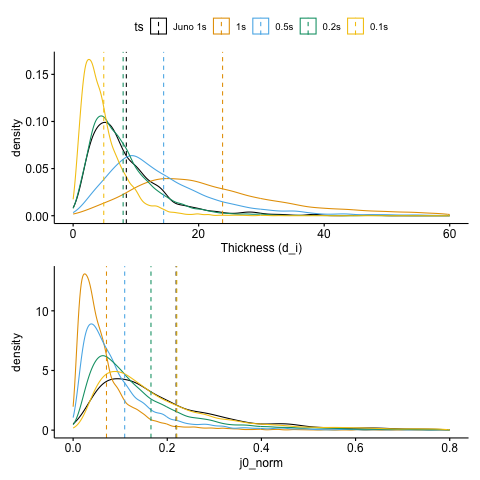

In [6]:
%%R
# sort color with 'JUNO 1s' first
temp_df <- df %>%
  mutate(ts = factor(ts, levels = c("Juno 1s", "1s", "0.5s", "0.2s", "0.1s")))

color <- "ts"
add <- "mean"
common_custom <- scale_color_okabeito(palette = "black_first")

x <- "L_mn"
x_lim <- c(0,7500)
p1 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "L_mn_norm"
x_lim <- c(0,60)
x_lab <- "Thickness (d_i)"
p2 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom + labs(x=x_lab)

x <- "j0"
x_lim <- c(0,20)
p3 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "j0_norm"
x_lim <- c(0,0.8)
p4 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

# p1 + p2 + p3 + p4  +
p2 + p4  +
  plot_layout(guides = 'collect', nrow=2) &
  theme(legend.position='top')